**Step 1: Load the Data**

In [1]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# import the dataset
train_data=pd.read_csv('/kaggle/input/playground-series-s4e6/train.csv')
test_data=pd.read_csv('/kaggle/input/playground-series-s4e6/test.csv')
sample_submission = pd.read_csv('/kaggle/input/playground-series-s4e6/sample_submission.csv')

**Step 2: Data Exploration and Preprocessing**

In [3]:
# Get an overview of the training data:
print(train_data.info())
print(train_data.describe())
print(train_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76518 entries, 0 to 76517
Data columns (total 38 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   id                                              76518 non-null  int64  
 1   Marital status                                  76518 non-null  int64  
 2   Application mode                                76518 non-null  int64  
 3   Application order                               76518 non-null  int64  
 4   Course                                          76518 non-null  int64  
 5   Daytime/evening attendance                      76518 non-null  int64  
 6   Previous qualification                          76518 non-null  int64  
 7   Previous qualification (grade)                  76518 non-null  float64
 8   Nacionality                                     76518 non-null  int64  
 9   Mother's qualification                 

We have loaded the data and performed an initial inspection. Here's a summary of what we've found:

* The dataset contains 38 columns and 76,518 rows.
* The target variable is 'Target' with possible values like Graduate, Dropout, and Enrolled.

In [4]:
# Check for missing values:
train_data.isnull().sum()

id                                                0
Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship 

There are 0 null values in the data.

Target
Graduate    36282
Dropout     25296
Enrolled    14940
Name: count, dtype: int64


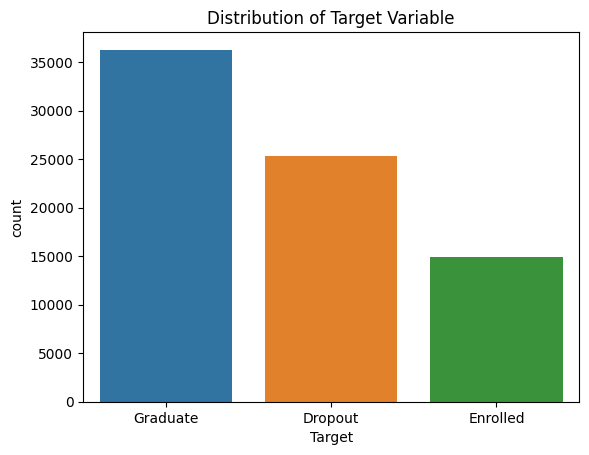

In [5]:
# Visualize the distribution of the target variable:
print(train_data['Target'].value_counts())
sns.countplot(x='Target',data=train_data)
plt.title('Distribution of Target Variable')
plt.show()

**The target variable, Target, represents the academic status of students in higher education and has three classes:**

1. Graduate
2. Dropout
3. Enrolled

Here's the distribution of the classes:

* Graduate: 36,282 students
* Dropout: 25,296 students
* Enrolled: 14,940 students

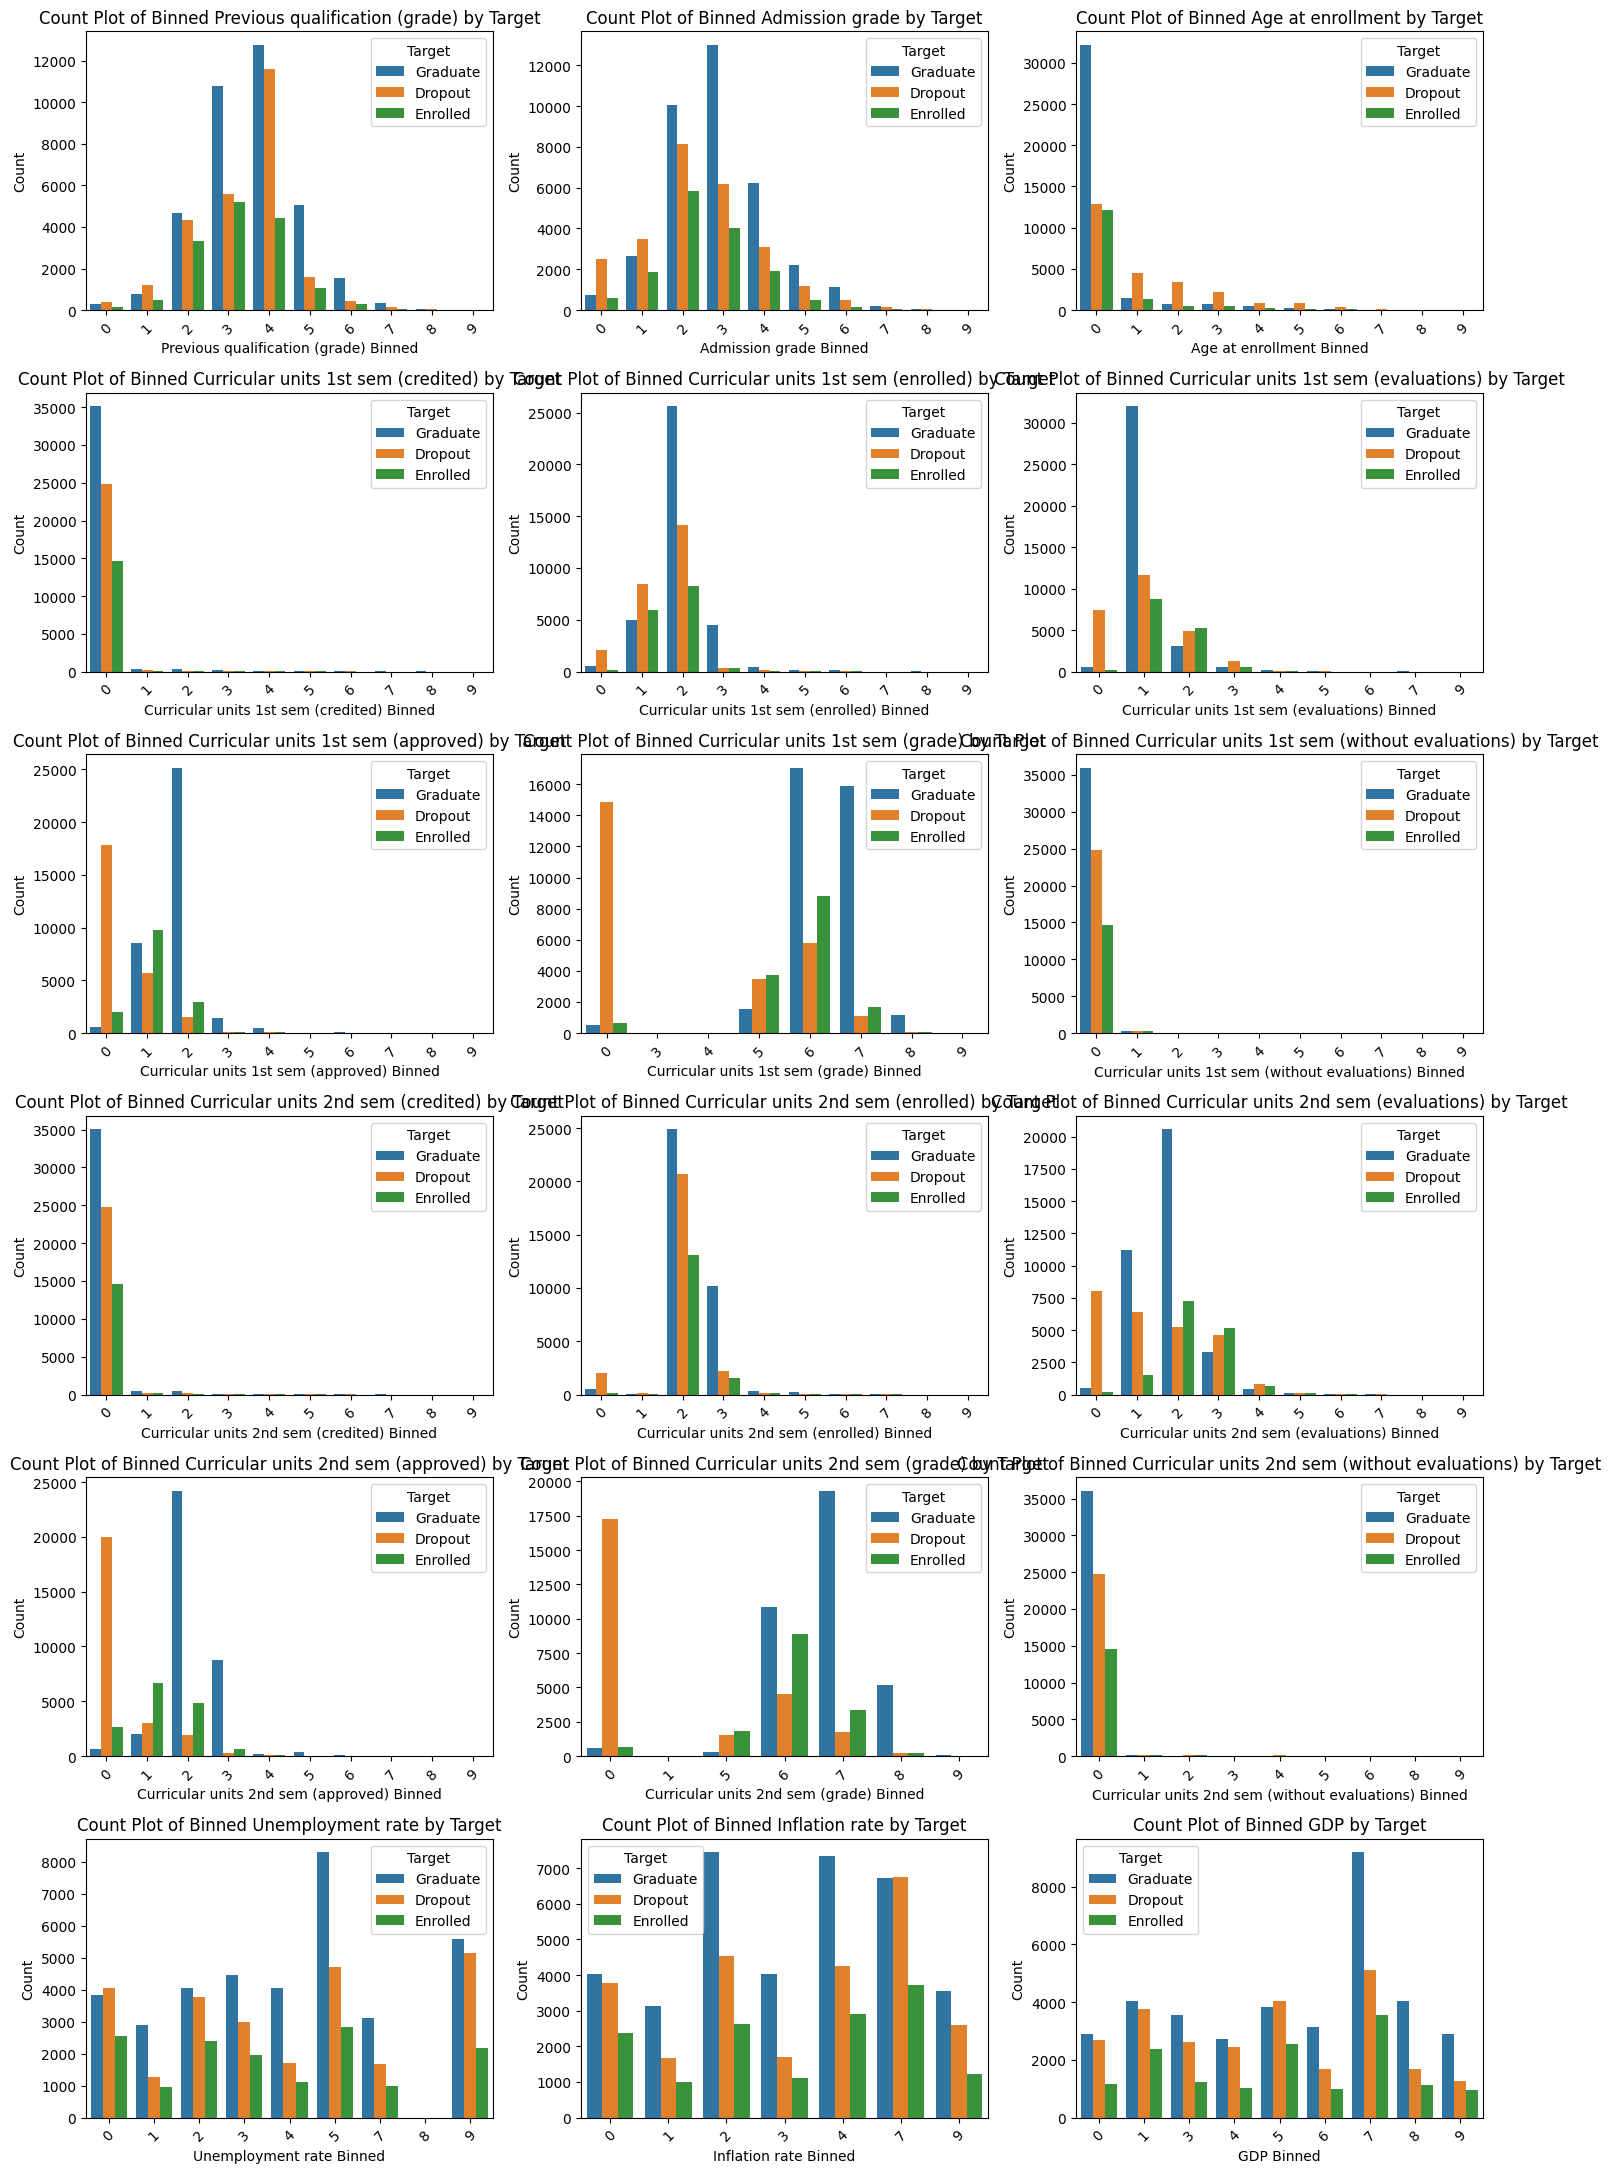

In [6]:
# Check the distribution of some numeric features:

# List of numerical features
num_features = [
    'Previous qualification (grade)', 'Admission grade', 'Age at enrollment',
    'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)',
    'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)',
    'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)',
    'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)',
    'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)',
    'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)',
    'Unemployment rate', 'Inflation rate', 'GDP'
]

# Binning the numerical features
for feature in num_features:
    train_data[feature + '_bin'] = pd.cut(train_data[feature], bins=10, labels=False)

# Plotting the binned numerical features with countplot
plt.figure(figsize=(15, 25))
for i, feature in enumerate(num_features, start=1):
    plt.subplot(7, 3, i)
    sns.countplot(x=feature + '_bin', hue='Target', data=train_data)
    plt.title(f'Count Plot of Binned {feature} by Target')
    plt.xlabel(feature + ' Binned')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



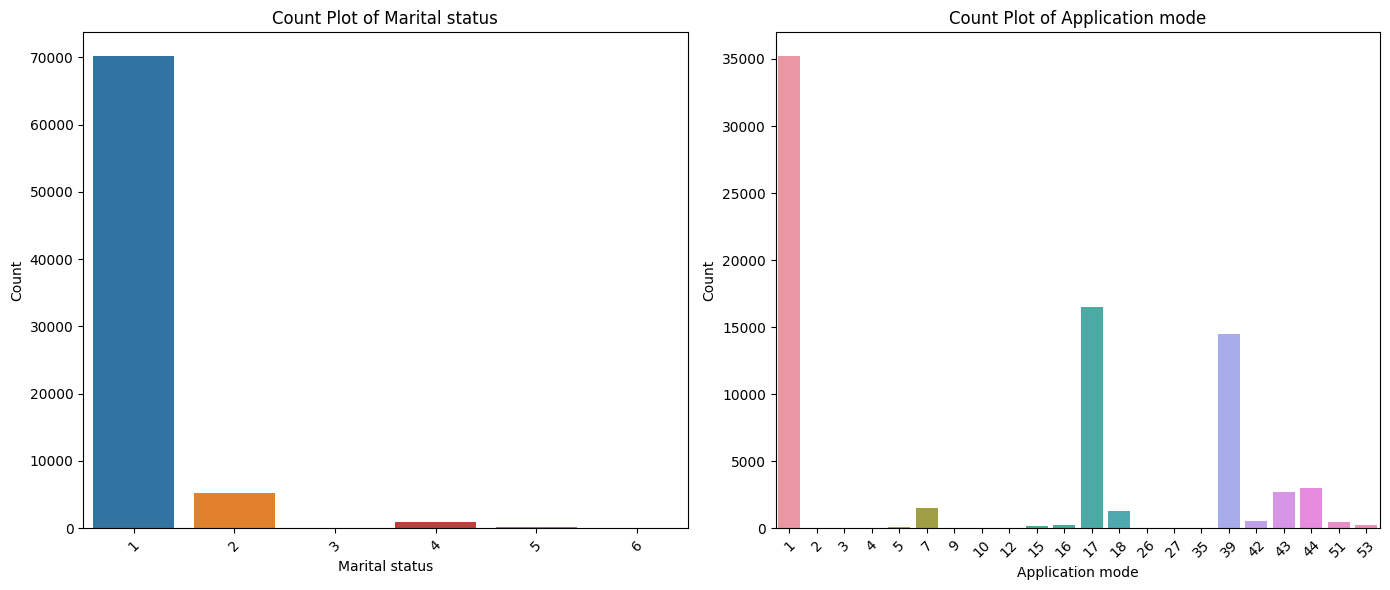

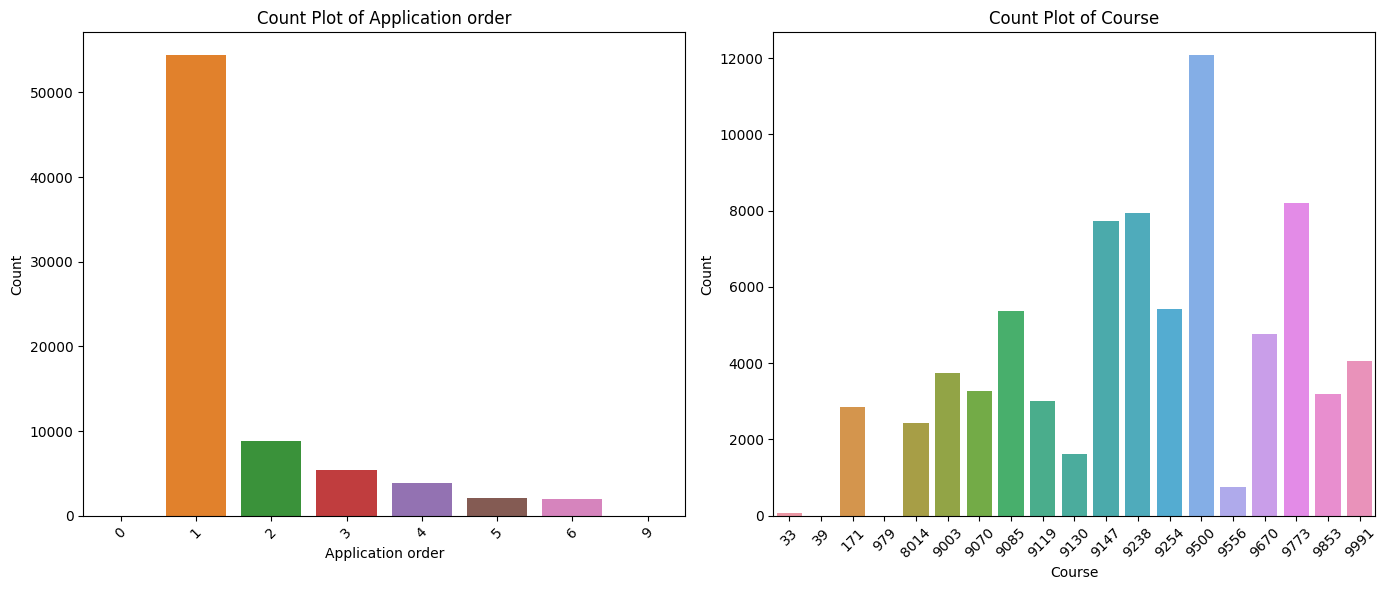

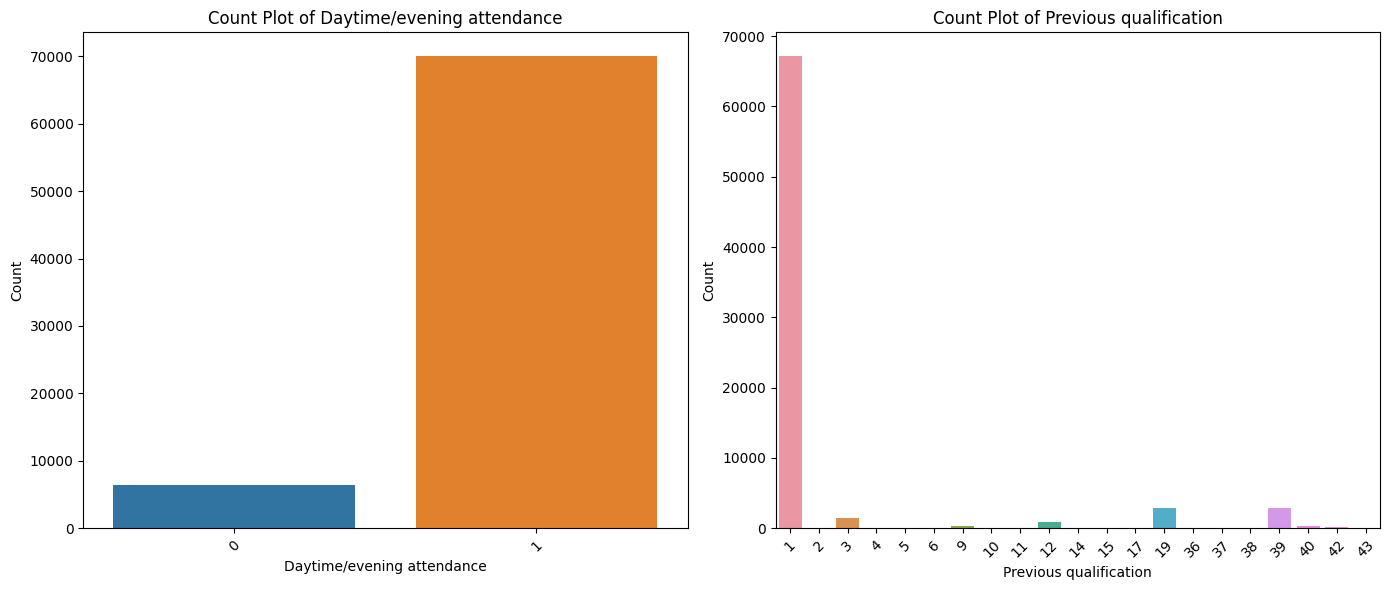

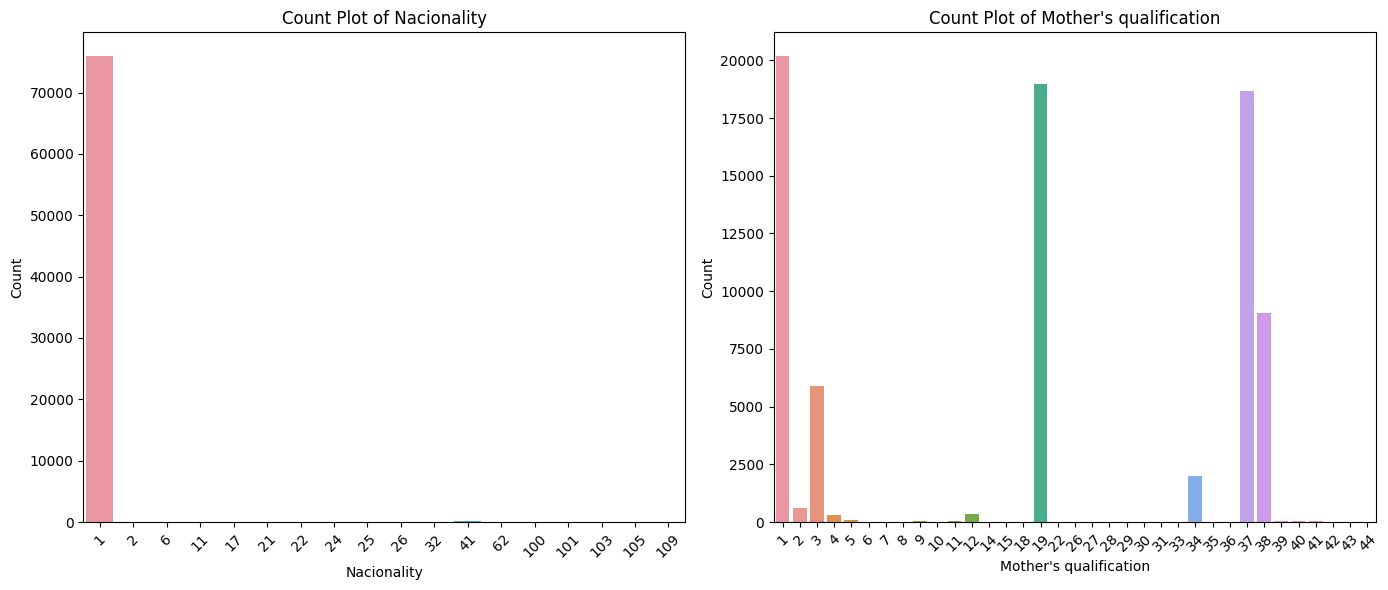

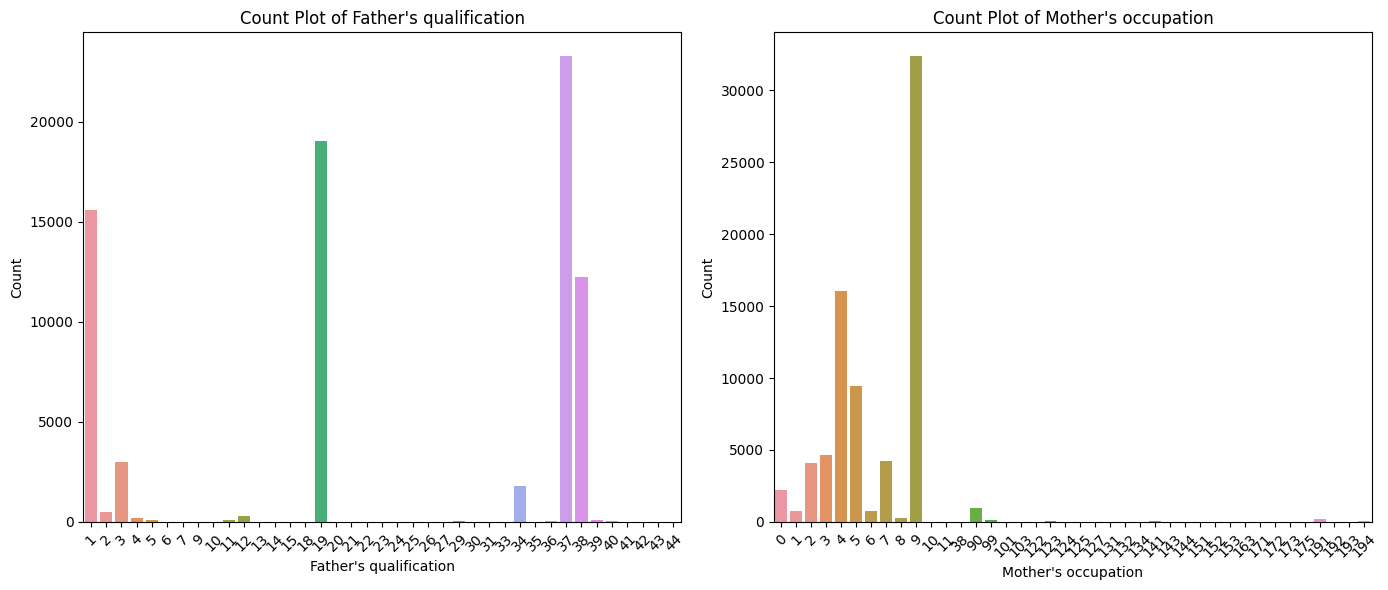

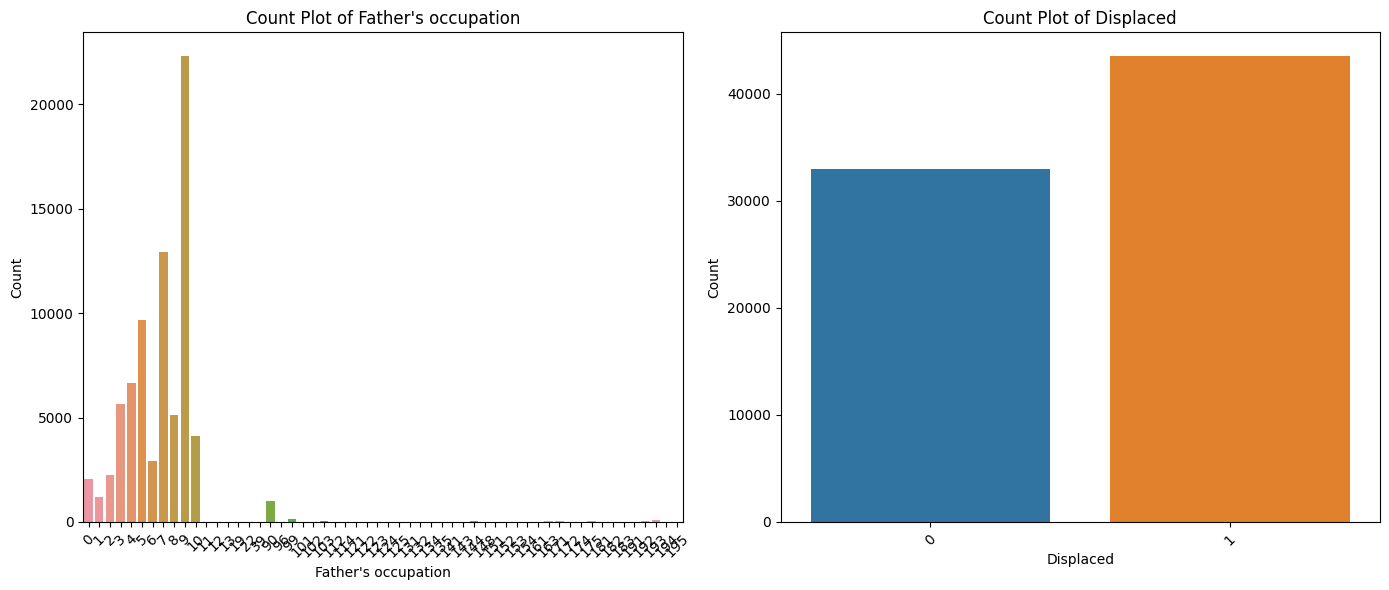

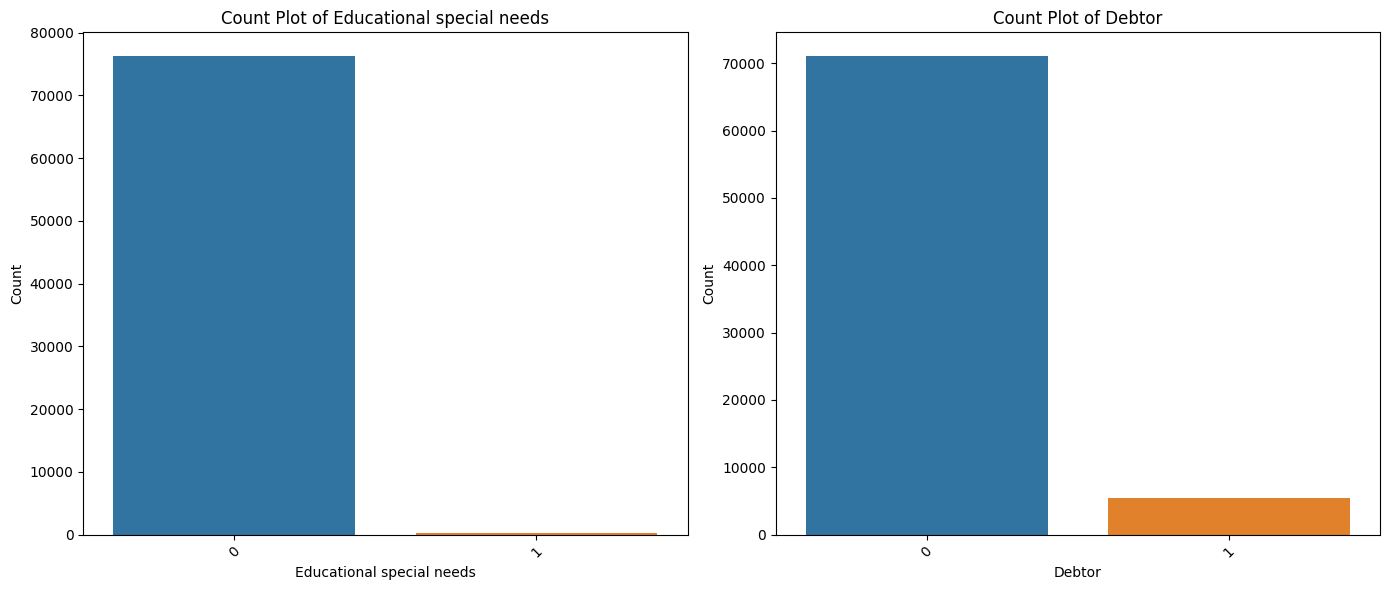

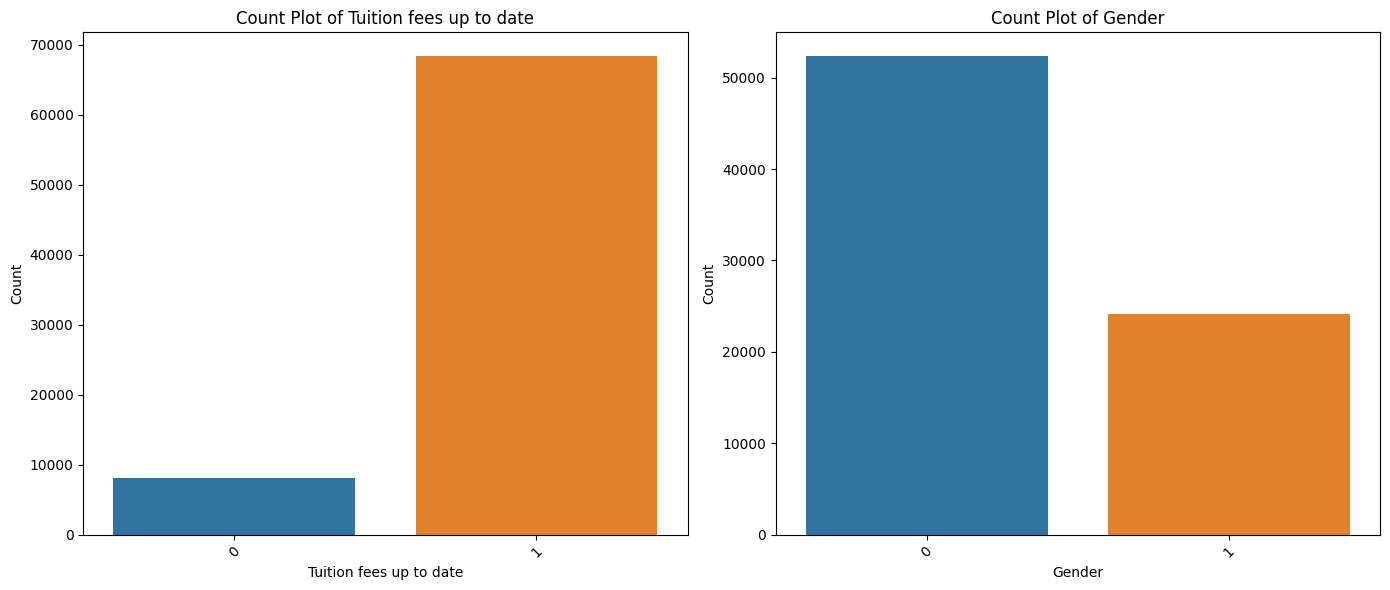

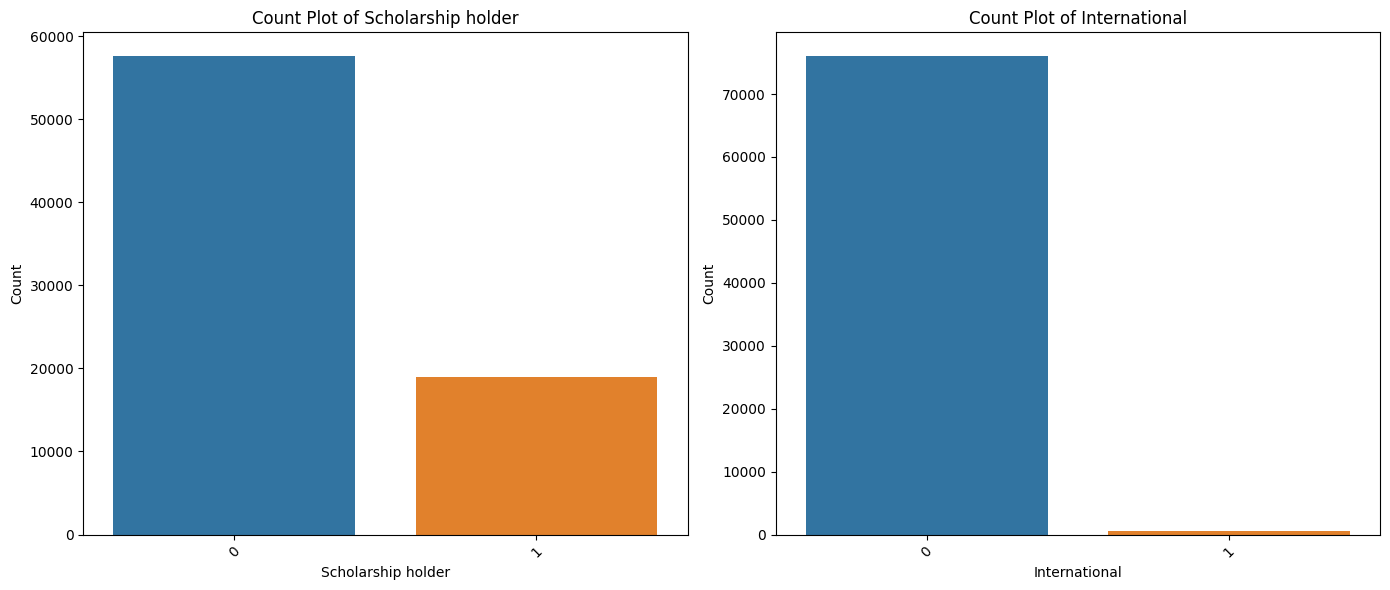

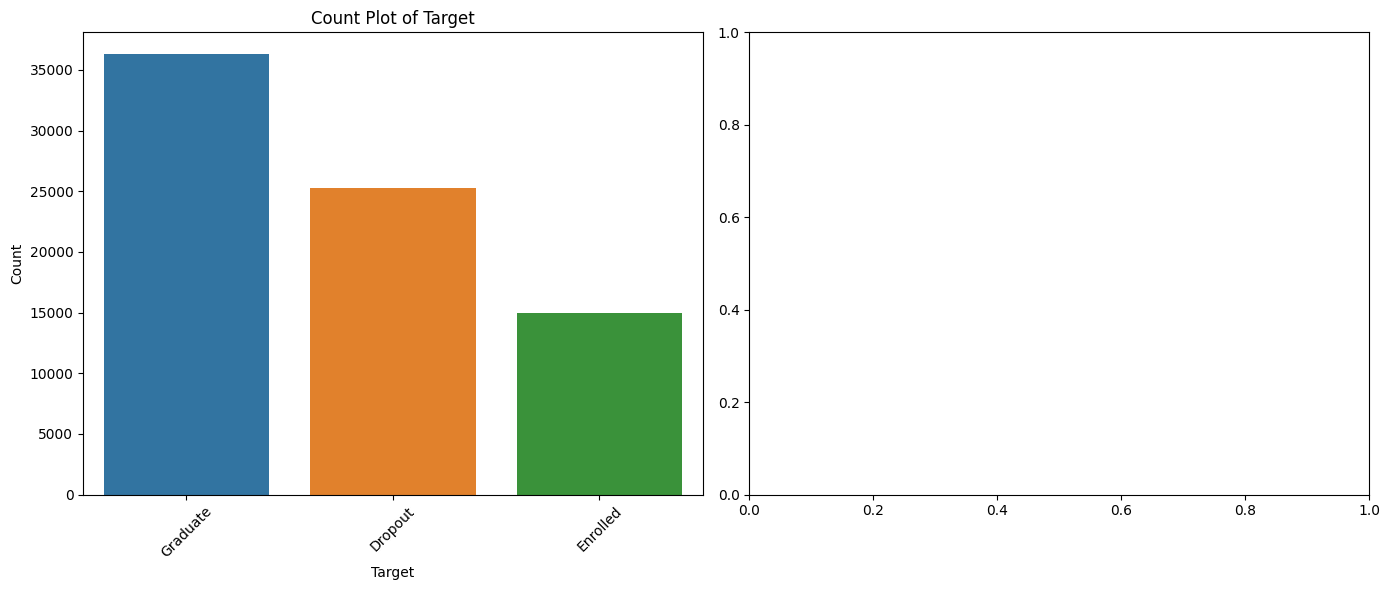

In [7]:
# Define Categorical Features:
cat_features = [
    'Marital status', 'Application mode', 'Application order', 'Course', 
    'Daytime/evening attendance', 'Previous qualification', 'Nacionality', 
    "Mother's qualification", "Father's qualification", "Mother's occupation", 
    "Father's occupation", 'Displaced', 'Educational special needs', 'Debtor', 
    'Tuition fees up to date', 'Gender', 'Scholarship holder', 'International', 'Target'
]

# Calculate Number of Rows for Subplots:
num_features = len(cat_features)
num_rows = (num_features + 1) // 2  # Number of rows needed for subplots

# Plotting Loop:
for i in range(num_rows):
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # Create subplot grid

    for j in range(2):
        idx = i * 2 + j  # Calculate index of current categorical feature
        if idx < num_features:
            feature = cat_features[idx]
            sns.countplot(x=feature, data=train_data, ax=axes[j])  # Plot count plot
            axes[j].set_title(f'Count Plot of {feature}')  # Set subplot title
            axes[j].set_xlabel(feature)  # Set x-axis label
            axes[j].set_ylabel('Count')  # Set y-axis label
            axes[j].tick_params(axis='x', rotation=45)  # Rotate x-axis labels if needed

    plt.tight_layout()  # Adjust subplot layout
    plt.show()  # Display the plot


**Summary**

1. Marital Status:
    Most students are single.

2. Application Mode:
    Mode 1 (online mode) applications are the most common, followed by Mode 2 (applications submitted through an educational agency), and so on.

3. Course Enrollment:
    The majority of students are enrolled in course 9500, followed by courses 9773 and 9238.

4. Attendance:
    Most students attend classes during the daytime, with very few attending evening classes.

5. Previous Qualification Grade:
    The most frequent previous qualification grade is 133.1.

6. International Students:
    The number of international students is less than the number of non-international students.

7. Gender:
    The number of male students is less than the number of female students.

8. Scholarship Holders:
    The number of scholarship holder students is less than the number of non-scholarship holder students.

9. Student Status:
    The number of enrolled students is less than the number of dropout students, which in turn is less than the number of graduate students

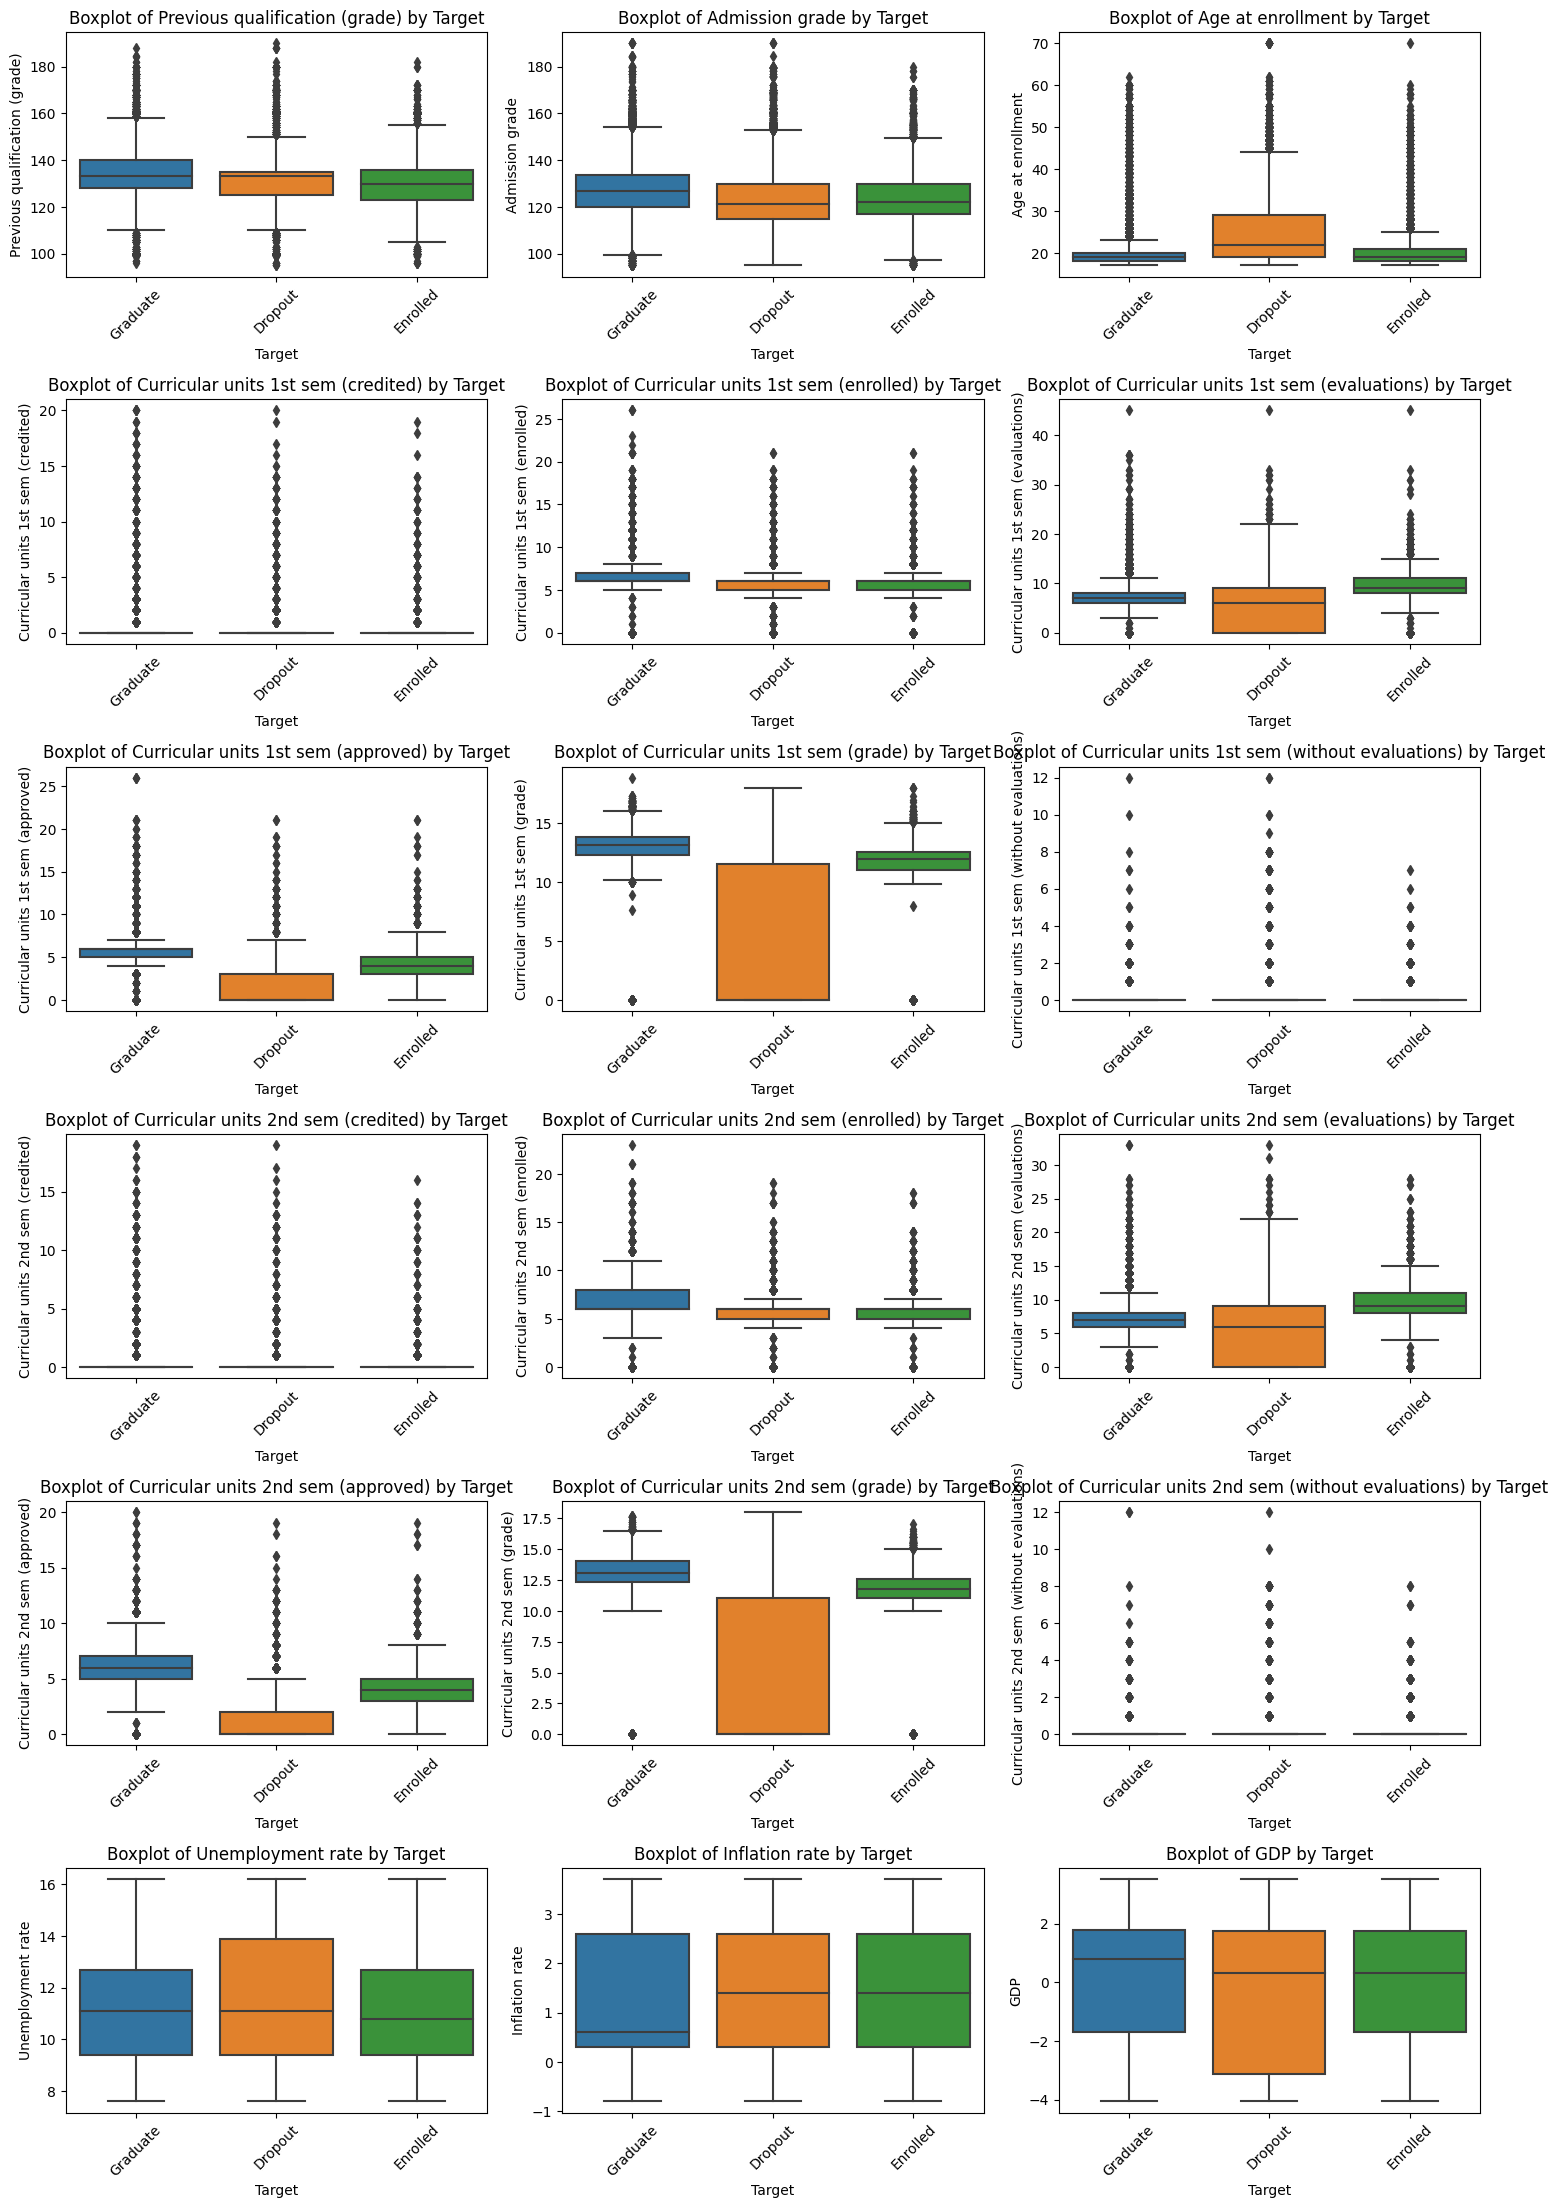

In [8]:
num_features = [
    'Previous qualification (grade)', 'Admission grade', 'Age at enrollment',
    'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)',
    'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)',
    'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)',
    'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)',
    'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)',
    'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)',
    'Unemployment rate', 'Inflation rate', 'GDP'
]
plt.figure(figsize=(15, 25))
for i, feature in enumerate(num_features, start=1):
    plt.subplot(7, 3, i)
    sns.boxplot(x='Target', y=feature, data=train_data)
    plt.title(f'Boxplot of {feature} by Target')
    plt.xlabel('Target')
    plt.ylabel(feature)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [9]:
from collections import Counter

# Function to identify outliers using the IQR method
def identify_outliers(train_data, features):
    outlier_indices = []
    for feature in features:
        Q1 = np.percentile(train_data[feature], 25)
        Q3 = np.percentile(train_data[feature], 75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR
        outlier_list_col = train_data[(train_data[feature] < Q1 - outlier_step) | (train_data[feature] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col)
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(k for k, v in outlier_indices.items() if v > 1)
    return multiple_outliers

# Identify outliers in the numerical features
outliers_to_drop = identify_outliers(train_data, num_features)

# Drop the outliers
train_data = train_data.drop(outliers_to_drop, axis=0).reset_index(drop=True)

print(f'Number of outliers removed: {len(outliers_to_drop)}')


Number of outliers removed: 26831


In [10]:
from scipy.stats import chi2_contingency

# List to store results
chi2_results = []

# Iterate through each categorical feature
for feature in cat_features:
    # Create contingency table
    contingency_table = pd.crosstab(train_data[feature], train_data['Target'])
    
    # Perform chi-square test
    chi2_statistic, p_value, dof, expected = chi2_contingency(contingency_table)
     
    # Null hypothesis and alternative hypothesis summary
    null_hypothesis = f"There is no association between {feature} and 'Target'"
    alternative_hypothesis = f"There is an association between {feature} and 'Target'"
    
   
    # Store results
    chi2_results.append({
        'Feature': feature,
        'Chi2-statistic': chi2_statistic,
        'P-value': p_value,
        'Null Hypothesis': null_hypothesis,
        'Alternative Hypothesis': alternative_hypothesis
    })

# Convert results to DataFrame for better visualization
chi2_results_df = pd.DataFrame(chi2_results)

# Display results
print(chi2_results_df)


                       Feature  Chi2-statistic        P-value  \
0               Marital status      252.048148   2.013428e-48   
1             Application mode     3599.382231   0.000000e+00   
2            Application order      599.100133  1.650101e-120   
3                       Course     8830.398170   0.000000e+00   
4   Daytime/evening attendance      372.044793   1.627420e-81   
5       Previous qualification     1065.299073  9.747883e-202   
6                  Nacionality       50.314206   1.150130e-02   
7       Mother's qualification     1425.656254  4.047700e-257   
8       Father's qualification     1170.146999  1.150143e-201   
9          Mother's occupation     1196.261350  9.022682e-206   
10         Father's occupation     1268.575366  2.408129e-198   
11                   Displaced      185.340070   5.674336e-41   
12   Educational special needs        2.948166   2.289886e-01   
13                      Debtor     3779.894915   0.000000e+00   
14     Tuition fees up to

##### The results of performing chi-square tests of independence between each categorical feature and the 'Target' variable in the dataset (train_data). Here's what each column represents:

* Feature: The categorical feature being tested for association with the 'Target' variable.

* Chi2-statistic: The computed chi-square statistic, which measures the discrepancy between observed and expected frequencies in the contingency table.

* P-value: The probability value associated with the chi-square statistic. It indicates the likelihood of observing the data given that the null hypothesis (no association between the feature and 'Target') is true. Smaller p-values (< 0.05) suggest stronger evidence against the null hypothesis.

* Null Hypothesis: Stated as "There is no association between [feature] and 'Target'". This hypothesis assumes that the feature and 'Target' are independent.

* Alternative Hypothesis: Stated as "There is an association between [feature] and 'Target'". This suggests that the feature and 'Target' are dependent or associated.

**Interpretation:**

1. Features with very low p-values (close to 0) indicate strong evidence to reject the null hypothesis, suggesting that these features are significantly associated with the 'Target' variable.
2. Features with high p-values (close to 1) indicate weak evidence against the null hypothesis, suggesting that these features may not be significantly associated with the 'Target' variable.

For example:

* Marital status, Application mode, Course, Previous qualification, Mother's qualification, Father's qualification, Mother's occupation, Father's occupation, Displaced, Debtor, Tuition fees up to date, Gender, Scholarship holder all have very low p-values (close to 0), indicating a strong association with the 'Target' variable.

* Educational special needs and International have higher p-values (close to 1), suggesting weaker evidence against the null hypothesis and indicating they may not be strongly associated with the 'Target' variable.

### Step 3: Feature Selection/Engineering (Based on Chi-Square Results)

In [11]:
# selected features based on chi-square test
selected_features_chi2 = [
    'Marital status', 'Application mode', 'Application order', 'Course',
    'Daytime/evening attendance', 'Previous qualification', 'Mother\'s qualification',
    'Father\'s qualification', 'Mother\'s occupation', 'Father\'s occupation',
    'Displaced', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder',
    'Previous qualification (grade)', 'Admission grade', 'Age at enrollment',
    'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)',
    'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)',
    'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)',
    'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)',
    'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)',
    'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)',
    'Unemployment rate', 'Inflation rate', 'GDP'
]

# Create final dataset with selected features
final_data = train_data[selected_features_chi2 + ['Target']].copy()

# Separate features and target variable
X = final_data.drop('Target', axis=1)  # Features
y = final_data['Target']  # Target variable

In [12]:
final_data

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,1,1,9238,1,1,1,19,5,5,...,0,6,7,6,12.428571,0,11.1,0.6,2.02,Graduate
1,1,17,1,9238,1,1,19,19,9,9,...,0,6,9,0,0.000000,0,11.1,0.6,2.02,Dropout
2,1,1,3,9500,1,1,19,3,3,2,...,0,8,11,7,12.820000,0,11.1,0.6,2.02,Enrolled
3,1,1,2,9500,1,1,19,37,4,9,...,0,7,12,6,12.933333,0,7.6,2.6,0.32,Graduate
4,1,44,1,9085,1,39,37,37,9,6,...,0,5,8,5,13.250000,0,12.4,0.5,1.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49682,1,17,1,9773,1,1,1,19,4,0,...,0,6,6,6,13.000000,0,12.4,0.5,1.79,Graduate
49683,1,1,1,9238,1,1,19,38,4,7,...,0,6,6,6,12.166667,0,7.6,2.6,0.32,Graduate
49684,1,17,1,9254,1,1,19,1,7,5,...,0,6,8,5,10.600000,0,13.9,-0.3,0.79,Graduate
49685,1,1,6,9254,1,1,1,38,4,9,...,0,6,9,6,13.875000,0,9.4,-0.8,-3.12,Graduate


### Step 4: Model Building

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

# To ignore warinings
import warnings
warnings.filterwarnings('ignore')

# Separate features and target variable
X=final_data.drop('Target',axis=1) # independent variables
y=final_data['Target'] # dependent/target variable


In [14]:
# Separate numerical and categorical features
num_features = ['Previous qualification (grade)', 'Admission grade', 'Age at enrollment',
                'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)',
                'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)',
                'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)',
                'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)',
                'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)',
                'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)',
                'Unemployment rate', 'Inflation rate', 'GDP']

cat_features = [col for col in X.columns if col not in num_features]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features using StandardScaler
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[num_features] = scaler.fit_transform(X_train[num_features])
X_test_scaled[num_features] = scaler.transform(X_test[num_features])

In [15]:
X_train_scaled[num_features]

,Previous qualification (grade),Admission grade,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
7361,1.756111,1.245164,3.043073,-0.056068,0.190076,-0.482995,0.662850,1.557446,-0.138266,-0.018516,0.038995,-0.964768,0.616432,0.101107,-0.119053,0.453620,1.919217,-0.828864
32533,-1.259723,-0.901493,-0.127073,-0.056068,0.190076,-0.981051,0.662850,-0.142920,-0.138266,-0.018516,0.038995,-0.496663,0.616432,-0.097956,-0.119053,-0.975732,0.177815,1.515578
1457,1.269686,1.138277,-0.127073,-0.056068,0.190076,2.007285,-0.041557,-1.049782,-0.138266,-0.018516,0.038995,-0.496663,0.616432,-0.097956,-0.119053,-0.787659,-1.487874,-1.467848
5201,-0.384158,-0.144373,0.071061,-0.056068,0.190076,0.513117,-0.041557,-0.777724,-0.138266,-0.018516,0.038995,0.439547,0.616432,-0.363373,-0.119053,-0.261056,0.177815,0.719098
38538,-0.870583,-1.070732,-0.127073,-0.056068,-1.429158,-0.482995,-0.745963,-1.219819,-0.138266,-0.018516,-1.195077,1.843862,-1.627648,-0.761499,-0.119053,-0.261056,0.177815,0.719098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,0.880546,0.488045,-0.523342,-0.056068,0.190076,0.015061,0.662850,0.423868,-0.138266,-0.018516,0.038995,-0.964768,-0.505608,-0.097956,-0.119053,0.453620,1.919217,-0.828864
44732,-0.676013,-0.643182,-0.325207,-0.056068,0.190076,0.015061,-0.041557,-1.185812,-0.138266,-0.018516,0.038995,0.439547,-0.505608,0.300169,-0.119053,0.340776,-0.503603,0.741597
38158,-0.870583,-0.821328,-0.127073,-0.056068,1.809310,-0.482995,1.367256,0.576901,-0.138266,-0.018516,2.507137,-0.028558,1.738471,0.096130,-0.119053,0.340776,-0.503603,0.741597
860,-0.870583,-0.839142,-0.523342,-0.056068,0.190076,-0.981051,0.662850,-0.029563,-0.138266,-0.018516,0.038995,-0.964768,0.616432,0.565587,-0.119053,-0.148212,-0.427890,0.845095


In [ ]:
from sklearn.pipeline import Pipeline

# Initialize models with default parameters inside a pipeline with scaler
models = {
    'Logistic Regression': Pipeline([('scaler', StandardScaler()), ('model', LogisticRegression())]),
    'Random Forest': Pipeline([('scaler', StandardScaler()), ('model', RandomForestClassifier())]),
    'Support Vector Machine': Pipeline([('scaler', StandardScaler()), ('model', SVC())])
}

# Define parameter grids for each model 
param_grids = {
    'Logistic Regression': {'model__C': [0.1, 1.0, 10.0]},
    'Random Forest': {'model__n_estimators': [100, 200, 300], 'model__max_depth': [None, 10, 20]},
    'Support Vector Machine': {'model__C': [1.0, 10.0], 'model__kernel': ['linear', 'rbf']}
}

# Train and evaluate models with GridSearchCV
for model_name, model in models.items():
    param_grid = param_grids[model_name]
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
    
    print(f'Tuning hyperparameters for {model_name}...')
    grid_search.fit(X_train, y_train)
    
    # Get the best model and its performance
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    
    # Evaluate
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    # Print results
    print(f'Best hyperparameters for {model_name}: {grid_search.best_params_}')
    print(f'Accuracy of {model_name}: {accuracy:.2f}')
    print(f'Classification Report:\n{report}')


Tuning hyperparameters for Logistic Regression...
Best hyperparameters for Logistic Regression: {'model__C': 0.1}
Accuracy of Logistic Regression: 0.77
Classification Report:
              precision    recall  f1-score   support

     Dropout       0.76      0.50      0.60      1575
    Enrolled       0.62      0.61      0.61      2599
    Graduate       0.84      0.92      0.88      5764

    accuracy                           0.77      9938
   macro avg       0.74      0.68      0.70      9938
weighted avg       0.77      0.77      0.76      9938

Tuning hyperparameters for Random Forest...
Best hyperparameters for Random Forest: {'model__max_depth': 20, 'model__n_estimators': 300}
Accuracy of Random Forest: 0.78
Classification Report:
              precision    recall  f1-score   support

     Dropout       0.82      0.50      0.62      1575
    Enrolled       0.63      0.66      0.65      2599
    Graduate       0.85      0.92      0.88      5764

    accuracy                      

In [ ]:
# Make predictions using the best model (Random Forest in this case)
best_rf_model = Pipeline([('scaler', StandardScaler()), ('model', RandomForestClassifier(max_depth=None, n_estimators=300))])
best_rf_model.fit(X_train, y_train)
y_pred = best_rf_model.predict(X_test)

# Create a DataFrame to show the results
results_df = pd.DataFrame({
    'id': X_test.index,  # Assuming your test data has an index or ID column
    'Target': y_pred
})

# Map the numerical predictions to categorical values if needed
target_mapping = {0: 'Dropout', 1: 'Enrolled', 2: 'Graduate'}  # Adjust this according to your target classes
results_df['Target'] = results_df['Target'].map(target_mapping)

# Display the results
print(results_df.head())
